In [1]:
# Import necessary libraries
import os
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

2024-12-04 23:07:08.349694: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
def extract_spectrogram(file_path):
    try:
        # Load audio file (limit duration to 5 seconds)
        y, sr = librosa.load(file_path, duration=5.0)
        print(f"Loaded audio: {file_path}, duration: {len(y)} samples")  # Debugging

        # Extract Mel Spectrogram
        spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

        if spectrogram.size == 0:
            print(f"Warning: Empty Spectrogram for file {file_path}")
            return None, None  # Return None for both spectrogram and sr if there's an error

        # Normalize the spectrogram (optional step)
        spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
        return spectrogram, sr
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None, None  # Return None if there's an error

In [19]:
def load_data(directory):
    features = []
    labels = []
    print(f"Scanning directory: {directory}")
    
    # Recursively walk through directories
    for root, dirs, files in os.walk(directory):
        for filename in files:
            print(f"Found file: {filename}")  # Debugging
            if filename.endswith('.wav'):  # Only process .wav files
                file_path = os.path.join(root, filename)
                print(f"Processing file: {file_path}")  # Debugging
                feature = extract_features(file_path)
                if feature is not None:  # Ensure features are not None
                    print(f"Feature shape: {feature.shape} for file {file_path}")  # Debugging
                    label = os.path.basename(root)  # Use the directory name as the label
                    features.append(feature)
                    labels.append(label)
                else:
                    print(f"Warning: Feature extraction failed for {file_path}")
    # Convert features to a NumPy array
    features = np.array(features)
    labels = np.array(labels)
    print(f"Loaded {len(features)} features and {len(labels)} labels.")  # Summary
    return features, labels

In [5]:
# Prompt user for the path to the 'bird_sounds' directory
directory = input("Please enter the path to the 'bird_sounds' directory: ").strip()

# Check if the directory exists
if not os.path.exists(directory):
    print(f"Error: The directory '{directory}' does not exist. Please check the path and try again.")
else:
    # Load the dataset
    X, y = load_data(directory)
    
    if len(y) == 0:
        print("Error: No features were loaded. Exiting.")
    else:
        print(f"Successfully loaded {len(X)} samples.")

Scanning directory: /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds
Found file: .DS_Store
Found file: Birds Voice.csv
Found file: .DS_Store
Found file: .DS_Store
Found file: Moluccan Megapode3.wav
Processing file: /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice_of_Birds/bird_species/Moluccan Megapode_sound/Moluccan Megapode3.wav
Error processing file /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice_of_Birds/bird_species/Moluccan Megapode_sound/Moluccan Megapode3.wav: module 'soundfile' has no attribute 'SoundFileRuntimeError'
Found file: Moluccan Megapode2.wav
Processing file: /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice_of_Birds/bird_species/Moluccan Megapode_sound/Moluccan Megapode2.wav
Error processing file /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice_of_Birds/bird_species/Moluccan Megapode_sound/Moluc

/Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/env/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=576
  warnings.warn(


Loaded audio: /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice of Birds/Voice of Birds/Dusky Megapode_sound/Dusky Megapode14.wav, duration: 110250 samples
Feature shape: (128,) for file /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice of Birds/Voice of Birds/Dusky Megapode_sound/Dusky Megapode14.wav
Found file: Dusky Megapode15.wav
Processing file: /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice of Birds/Voice of Birds/Dusky Megapode_sound/Dusky Megapode15.wav
Loaded audio: /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice of Birds/Voice of Birds/Dusky Megapode_sound/Dusky Megapode15.wav, duration: 110250 samples
Feature shape: (128,) for file /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice of Birds/Voice of Birds/Dusky Megapode_sound/Dusky Megapode15.wav
Found file: Dusky Megapode29.wav
Processing file: /Us

Loaded audio: /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan2.wav, duration: 110250 samples


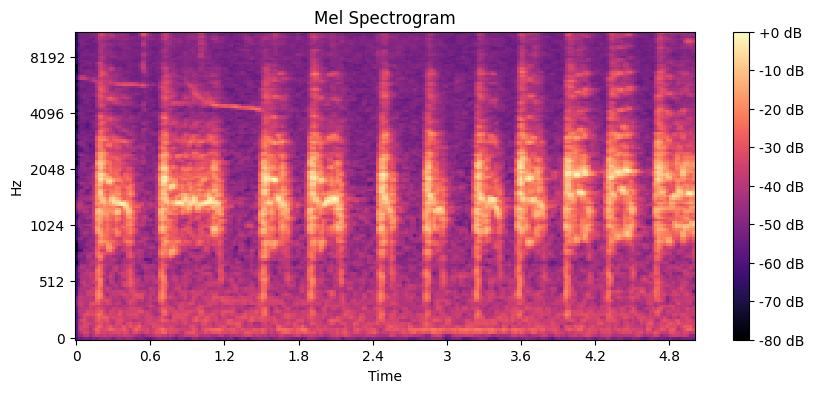

In [20]:
def plot_spectrogram(spectrogram, sr):
    if spectrogram is not None and spectrogram.size > 0:
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(spectrogram, y_axis='mel', x_axis='time', sr=sr)
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel Spectrogram')
        plt.show()
    else:
        print("Spectrogram is empty, cannot plot.")

# Example usage
file_path = "/Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan2.wav"  # Replace with your file path

# Extract spectrogram from the audio file
spectrogram, sr = extract_spectrogram(file_path)

# Check and plot the spectrogram
plot_spectrogram(spectrogram, sr)